In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
data_train=pd.read_excel("C:\\Users\\quick\\OneDrive\\Pictures\\Documents\\train dataset.xlsx")
data_test=pd.read_excel("C:\\Users\\quick\\OneDrive\\Pictures\\Documents\\test data.xlsx")


In [30]:
data_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [31]:
data_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [32]:
data_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


<Axes: >

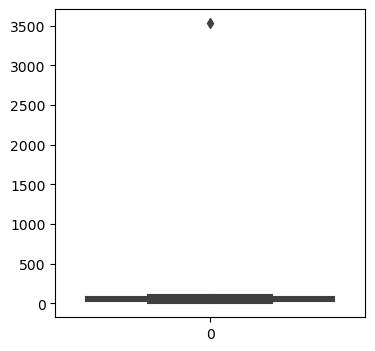

In [33]:
plt.figure(figsize=(4,4))
sns.boxplot(data_train['x'])

In [34]:
import numpy as np
Q1 = np.percentile(data_train['x'], 25)
Q3 = np.percentile(data_train['x'], 75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [35]:
lower_bound,upper_bound

(-50.0, 150.0)

In [38]:
# Identify outliers
outliers = data_train[(data_train['x'] < lower_bound) | (data_train['x'] > upper_bound)]
outliers

,x,y
213,3530.157369,NaN


In [39]:
# Remove outliers from the dataset
data_train = data_train[(data_train['x'] >lower_bound) & (data_train['x'] < upper_bound)]
data_train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [42]:
data_test['x'].isnull().sum(),data_test['y'].isnull().sum()

(0, 0)

In [43]:
x_train=data_train['x'].values.reshape(-1,1)
y_train=data_train['y'].values.reshape(-1,1)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
x_test=data_test['x'].values.reshape(-1,1)
y_test=data_test['y'].values.reshape(-1,1)
prediction=model.predict(x_test)

In [45]:
mse=mean_squared_error(y_test,prediction)
r_sq=r2_score(y_test,prediction)
mse,r_sq

(9.432922192039305, 0.9888014444327563)

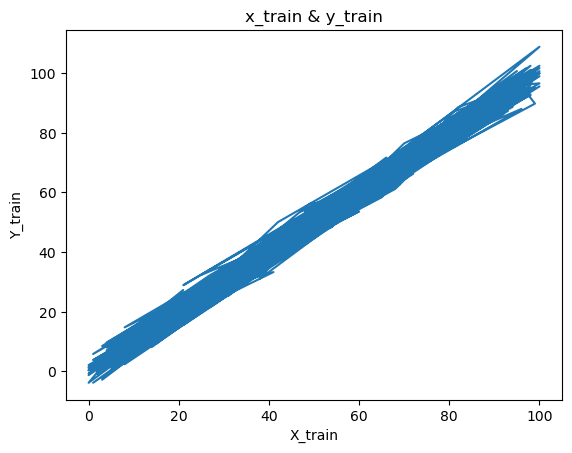

In [48]:
plt.title('x_train & y_train')
plt.plot(x_train,y_train)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

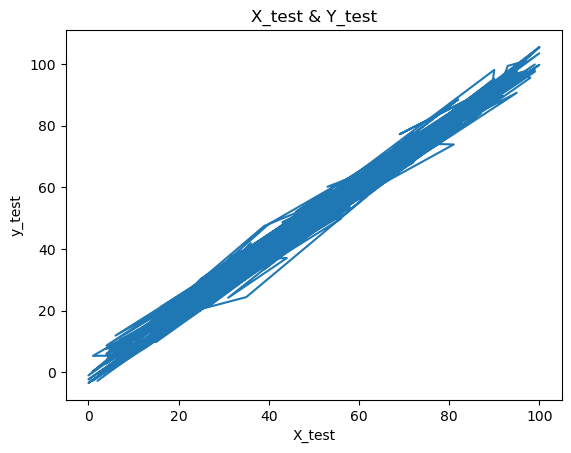

In [51]:

plt.title('X_test & Y_test')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(x_test,y_test)
plt.show()